## STUDENT PERFORMANCE INDECATOR ##

### LIFE CYCLE OF THIS PART OF THIS PROJECT ###

- Problem Statement
- Data collection
- Data checks to perform 
- EDA 
- Pre-processing 
- Model Training
- Choose the best model


#### Problem Statement ####
- This project understands how the student's performance is affected by other variables such as Gender ,Parntal Lavel of Eduction and other related aspects

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv(r"C:\ML_project1\notebook\data\student.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


---
Inference till now  
- we dont have any null values in the data
- our data has 7 different attributes and 1000 columns(entries)
- our data consists of 4 catogorical features and 3 numerical features

In [32]:
print(df.duplicated().sum())

0


In [33]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [34]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
# check for the different categories in each of the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique categories in '{col}': {df[col].unique()} total: {df[col].nunique()}\n")

Unique categories in 'gender': ['female' 'male'] total: 2

Unique categories in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E'] total: 5

Unique categories in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] total: 6

Unique categories in 'lunch': ['standard' 'free/reduced'] total: 2

Unique categories in 'test_preparation_course': ['none' 'completed'] total: 2



In [36]:
numerical_features = [feature for feature in df.columns if df[feature ].dtype not in ['object']]
categorical_features = [feature for feature in df.columns if df[feature ].dtype == 'object']
print('Numerical features:', numerical_features)
print('Categorical features:', categorical_features)

Numerical features: ['math_score', 'reading_score', 'writing_score']
Categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


---
#### Adding totals to get total score and average score
---

In [37]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [38]:
#calculating the student with full marks in each subjects
full_marks_math = df[df['math_score'] == 100].count()
full_marks_reading = df[df['reading_score'] == 100].count()
full_marks_writing = df[df['writing_score'] == 100].count()
print("Students with full marks in each subject:")
print(f"Math: {full_marks_math['math_score']}")
print(f"Reading: {full_marks_reading['reading_score']}")
print(f"Writing: {full_marks_writing['writing_score']}")

Students with full marks in each subject:
Math: 7
Reading: 17
Writing: 14


## visualization

Text(0.5, 1.0, 'Average Score by Gender')

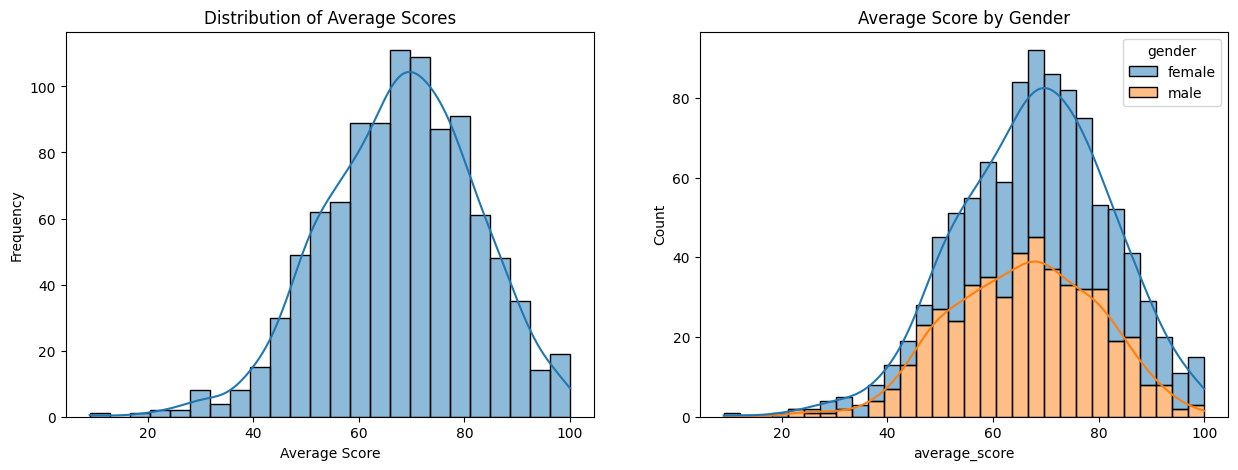

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x= 'average_score' ,kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average_score', hue='gender', multiple="stack",kde = True,bins=30)
plt.title('Average Score by Gender')

<Axes: xlabel='total_score', ylabel='Count'>

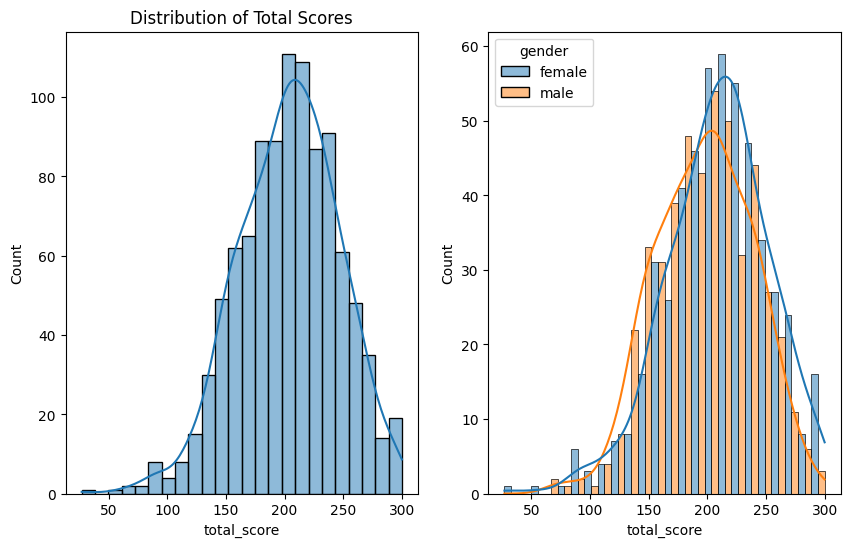

In [44]:
fig = plt.subplots(1,2,figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total_score',kde=True)
plt.title('Distribution of Total Scores')
plt.subplot(1,2,2)
sns.histplot(data = df,x='total_score',kde=True,hue='gender',multiple="dodge")